# User Experience Analysis

We will be continuing where we left of on the User Engagement notebook

In [1]:
%%capture
%run "./2-User-Engagement-Analysis.ipynb"
# users_data = users_data.head()
# if 'Unnamed: 0' in users_data.columns:
#     users_data.drop(columns=['Unnamed: 0'], inplace=True)


In [2]:
type(users_data)

pandas.core.groupby.generic.DataFrameGroupBy

per customer Aggregation of QoS related features

 - Average TCP retransmission Volumne
 - Average RTT durations in ms
 - Handset type
 - Average throughput


In [3]:
avg_TCPr_uldl_vol_columns = ['TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)']
avg_TCPr_uldl_vol = users_data[avg_TCPr_uldl_vol_columns].sum()
avg_TCPr_uldl_vol.head()

,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes)
MSISDN/Number,,
33601001722.00,21006808.73,771051.81
33601001754.00,21006808.73,771051.81
33601002511.00,21006808.73,771051.81
33601007832.00,1066.00,771051.81
33601008617.00,30356438.73,792253.81


In [4]:
avg_RTT_uldl_columns = ['Avg RTT DL (ms)', 'Avg RTT UL (ms)']
avg_RTT_uldl = users_data[avg_RTT_uldl_columns].sum()
avg_RTT_uldl.head()

,Avg RTT DL (ms),Avg RTT UL (ms)
MSISDN/Number,,
33601001722.00,46.00,0.00
33601001754.00,30.00,1.00
33601002511.00,45.00,5.00
33601007832.00,69.00,15.00
33601008617.00,114.00,5.00


In [5]:
handset_type = users_data['Handset Type'].unique()
handset_type.head(5)


MSISDN/Number
33601001722.00    [Huawei P20 Lite Huawei Nova 3E]
33601001754.00            [Apple iPhone 7 (A1778)]
33601002511.00                         [undefined]
33601007832.00           [Apple iPhone 5S (A1457)]
33601008617.00           [Apple iPhone Se (A1723)]
Name: Handset Type, dtype: object

In [6]:
avg_tp_uldl_columns = [
    'Avg Bearer TP DL (kbps)',
    'Avg Bearer TP UL (kbps)'
]
avg_tp_uldl = users_data[avg_tp_uldl_columns].sum()
avg_tp_uldl.head()


,Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
MSISDN/Number,,
33601001722.00,37.00,39.00
33601001754.00,48.00,51.00
33601002511.00,48.00,49.00
33601007832.00,204.00,44.00
33601008617.00,40395.00,16449.00


## 10 of the top, bottom and most frequent:

 - TCP values in the dataset. 
 - RTT values in the dataset.
 - Throughput values in the dataset.


In [7]:
padding = '+'*15
for column in avg_TCPr_uldl_vol.columns:
    top_ten = avg_TCPr_uldl_vol[column].nlargest(10)
    bottom_ten = avg_TCPr_uldl_vol[column].nsmallest(10)
    most_frequent = avg_TCPr_uldl_vol[column].mode()
    print(f"{padding} TCP Values {padding}")
    print(f"Top Ten {column}:\n{top_ten}\n{padding*3}")
    print(f"Bottom Ten {column}:\n{bottom_ten}\n{padding*3}")
    print(f"Most Frequent {column}:\n{most_frequent}\n{padding*3}")

+++++++++++++++ TCP Values +++++++++++++++
Top Ten TCP DL Retrans. Vol (Bytes):
MSISDN/Number
33667725464.00   8332732777.00
33659084281.00   7938178623.00
33660977522.00   7374100838.00
33761284050.00   6039191773.00
33762644658.00   5878002490.00
33650658056.00   5590343967.00
33663180885.00   5562845158.00
33763572381.00   5178607391.00
33658638625.00   5165784763.00
33763859490.00   5094170807.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
Bottom Ten TCP DL Retrans. Vol (Bytes):
MSISDN/Number
33664535559.00   2.00
33761543605.00   2.00
33669309035.00   4.00
33669328368.00   4.00
33699002991.00   4.00
33699060950.00   4.00
33761506920.00   4.00
33761544858.00   4.00
33761619710.00   4.00
33763938150.00   4.00
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++++++++++++++++++++++++++
Most Frequent TCP DL Retrans. Vol (Bytes):
0   21006808.73
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
+++++++++++++++++++++

 - The distribution of the `average throughput`  **per** `handset type`
 - The `average TCP retransmission` view **per** `handset type`


In [8]:
handsets_data = df.groupby('Handset Type')


The `average throughput`

<AxesSubplot:xlabel='Handset Type'>

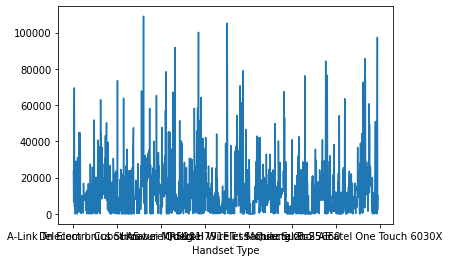

In [9]:
handsets_tp = handsets_data[avg_tp_uldl_columns].mean().sum(axis=1)
handsets_tp.plot()

The `average TCP retransmission` 

<AxesSubplot:xlabel='Handset Type'>

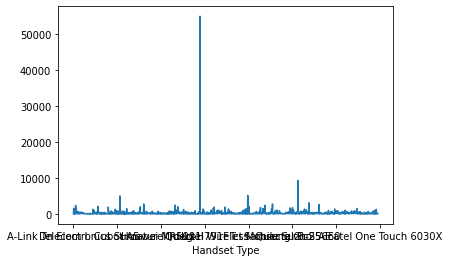

In [10]:
handsets_rtt = handsets_data[avg_RTT_uldl_columns].mean().sum(axis=1)
handsets_rtt.plot()

In [11]:
handsets_rtt.nlargest(5)

Handset Type
Lg Lg-D315                                          54848.00
Sfr Starxtrem5                                       9274.00
Qingdao Hisense. Starxtrem 6                         5133.00
Ecom Instruments. Ecom Mobile Safety Ex-Handy 209    4999.00
Sony Ericsson E15I                                   3092.00
dtype: float64

The `Lg Lg-D315` looks to be having the worst experiance in terms of retransmissions.
#### Check if it was an isolated incident.

In [27]:
lg_user = df[df['Handset Type'] == 'Lg Lg-D315']
print(f"There is {len(lg_user)} 'Lg Lg-D315' Users in the db")
from datetime import timedelta
session_duration = timedelta(milliseconds=lg_user['Dur. ms'].values[0])
print(session_duration)

There is 1 'Lg Lg-D315' Users in the db
12:25:31.150000


# K-means clustering

MSISDN/Number
33601001722.00          38.00
33601001754.00          49.50
33601002511.00          48.50
33601007832.00         124.00
33601008617.00       28422.00
                       ...   
33789996170.00        5182.50
33789997247.00          58.00
3197020876596.00         0.50
337000037000919.00      16.50
882397108489451.00       1.00
Length: 106471, dtype: float64

In [43]:
avg_RTT = avg_RTT_uldl.sum(axis=1)
avg_TCPr = avg_TCPr_uldl_vol.sum(axis=1)
avg_tp = avg_tp_uldl.mean(axis=1)
# features = [avg_RTT_uldl,
#             avg_TCPr_uldl_vol,
#             avg_tp_uldl
#             ]
experiance = {
    'MSISDN/Number': avg_tp.index,
    'avg_RTT_ms': avg_RTT.values,
    'avg_TCPr_bytes': avg_TCPr.values,
    'avg_tp_kbps': avg_tp.values
    
}

user_experiance = pd.DataFrame(experiance)
user_experiance = cleaner.fix_datatypes(user_experiance)
user_experiance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106471 entries, 0 to 106470
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   MSISDN/Number   106471 non-null  object 
 1   avg_RTT_ms      106471 non-null  float64
 2   avg_TCPr_bytes  106471 non-null  float64
 3   avg_tp_kbps     106471 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.2+ MB


In [44]:
# Pre-Process / Normalize
norm_user_experiance = cleaner.normalize(user_experiance)

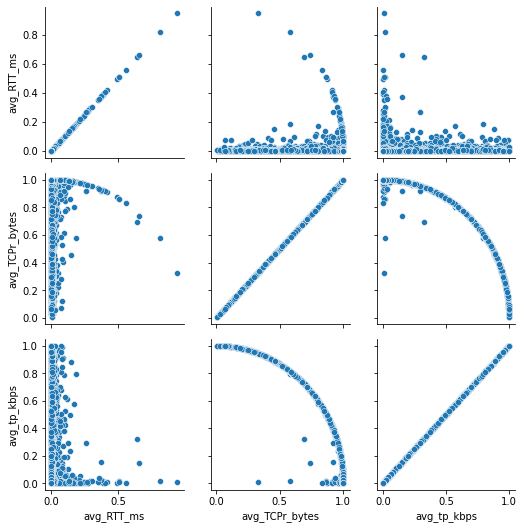

In [45]:
g = sns.PairGrid(norm_user_experiance)
g.map(sns.scatterplot)

In [46]:
X = np.array(norm_user_experiance)
X.shape



(106471, 3)

In [50]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter=300,
                n_init=10,
                random_state=10)
model = kmeans.fit(X)
with open("../models/experiance_clustering_model.pkl", "wb") as f:
    pickle.dump(model, f)
    print("model saved")

user_experiance['clusters_by_experiance'] = model.predict(X)
user_experiance['clusters_by_experiance'].unique()


model saved


array([0, 2, 1], dtype=int32)

In [48]:
user_experiance.groupby("clusters_by_experiance").agg(['count', 'min', 'max', 'mean', 'sum', 'std', 'skew'])

/tmp/ipykernel_31380/3375685404.py:1: FutureWarning:

['MSISDN/Number'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



avg_RTT_ms                                                avg_TCPr_bytes                                                                      avg_tp_kbps                                                      
                            count   min      max   mean         sum    std  skew          count    min           max        mean              sum          std  skew       count    min       max     mean           sum      std skew
clusters_by_experiance                                                                                                                                                                                                                
0                          103351  0.00 96924.00 156.05 16128067.00 672.16 57.13         103351 466.00 8354209105.00 31291900.44 3234049202456.77 155858962.08 23.01      103351   0.00 451111.00 10231.44 1057429734.50 21301.76 4.03
1                            1198 21.00   548.00  59.32    71065.00  44.67  4.95           1198  97.00     159132.00     8802.62      10545537.00     10014.48  4.61        1198 660.50 191435.50 20886.60   25022147.00 16558.91 2.34
2                            1922 20.00  3940.00  78.06   150032.00 115.62 21.11           1922 182.00     631034.00    43293.30      83209722.00     47595.91  3.38        1922  84.50 161043.50 18552.91   35658695.50 17202.04 2.40

## Describe the above

In [49]:
X.shape

(106471, 3)